Let us prepare the data for future applications.
- We have already prepared the training set.
- Validation & Test set need some preparation.

In [12]:
# !unzip /content/drive/MyDrive/data_folder/val.zip

In [13]:
# !rm -rf /content/orientation.mantaray.coc

In [14]:
# !rm -rf '/content/drive/MyDrive/data_folder/content'

In [15]:
# !mv /content/content/orientation.mantaray.coco/images/val2020 /content/drive/MyDrive/data_folder

Both the data folders have been loaded. Next, let us write a small script to load a few hundred images, extract background, and then load that as a small testing dataset for our `Siamese Model`. 

In [17]:
import os
val2020list = os.listdir('/content/drive/MyDrive/data_folder/val2020')

In [65]:
import random
from random import sample
random.seed(77)
sample_val = sample(val2020list,200)

Here we use a generator to have a view at the images in the validation set.

In [66]:
def gen_val():
  for i in range(0,len(sample_val),20):
    yield i

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

genobj = gen_val()

def image_viewer(rows: int = 5, cols: int = 4, root_train_dir = "/content/train2020/"):

  # Get the list of images in training directory
  start = next(genobj)
  
  names = sample_val[start:start+20]

  # Create a grid
  _, axes_grid = plt.subplots(cols, rows, figsize = (3*rows, 3*cols))

  it = 0
  for ax in axes_grid:
    for j in ax:
      j.axis('off')

      j.imshow(np.array(Image.open(os.path.join(root_train_dir,names[it])).resize((200, 200))))
      j.set_title(names[it])
      it += 1

Set of 20 images.

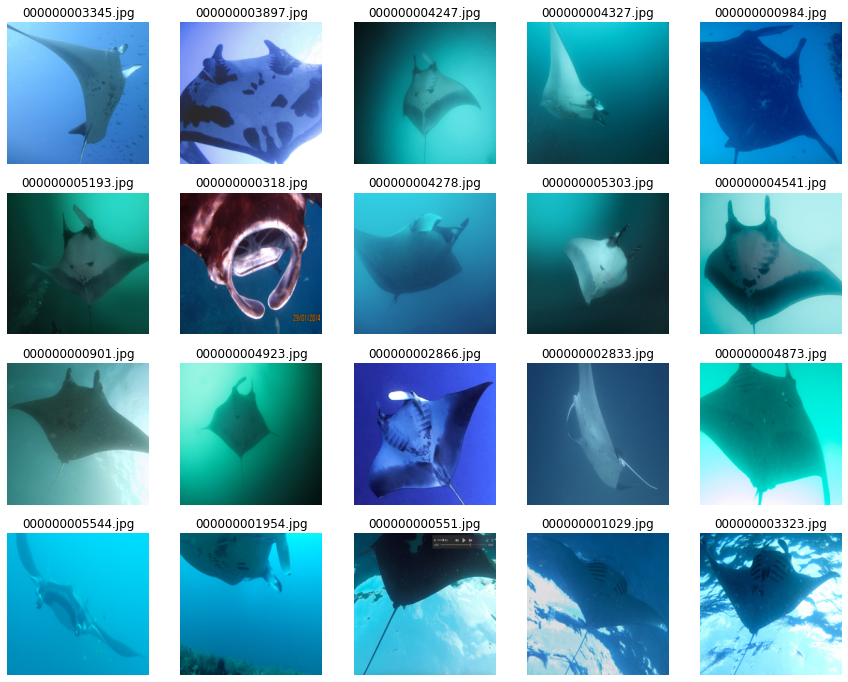

In [68]:
image_viewer(root_train_dir = "/content/drive/MyDrive/data_folder/val2020")

Let us create the background from this 200 images.

The process of creating background is naive, and just chips the top left, top right, bottom left and bottom right of an image to form the background image.

In [69]:
from PIL import Image
from tqdm import tqdm

for i in tqdm(sample_val):
  if 'jpg' in i:
    infile = '/content/drive/MyDrive/data_folder/val2020/'+i
    chopsize = 720

    img = Image.open(infile)
    width, height = img.size

    # Save Chops of original image
    box_tl = (0,0,chopsize, chopsize)
    box_tr = (width - chopsize,0, width, chopsize)
    box_bl = (0, height - chopsize, chopsize, height)
    box_br = (width - chopsize, height - chopsize, width, height)
    
    try:
      img.crop(box_tl).save('/content/processed_files/back_tl_%s.jpg' % (i[:-4]))

    except SystemError:
            pass

    try:
      img.crop(box_tr).save('/content/processed_files/back_tr_%s.jpg' % (i[:-4]))

    except SystemError:
            pass

    try:
      img.crop(box_bl).save('/content/processed_files/back_bl_%s.jpg' % (i[:-4]))

    except SystemError:
            pass

    try:
      img.crop(box_br).save('/content/processed_files/back_br_%s.jpg' % (i[:-4]))

    except SystemError:
            pass

  else:
    print(f'Weird file skipped {i}')
          
          
  

100%|██████████| 200/200 [00:26<00:00,  7.54it/s]


Zip and save the file to google drive.

In [74]:
!zip -r process.zip '/content/processed_files'

  adding: content/processed_files/ (stored 0%)
  adding: content/processed_files/back_br_000000001838.jpg (deflated 12%)
  adding: content/processed_files/back_tr_000000004557.jpg (deflated 7%)
  adding: content/processed_files/back_br_000000001029.jpg (deflated 3%)
  adding: content/processed_files/back_bl_000000004148.jpg (deflated 10%)
  adding: content/processed_files/back_br_000000000042.jpg (deflated 1%)
  adding: content/processed_files/back_br_000000004127.jpg (deflated 7%)
  adding: content/processed_files/back_tl_000000002485.jpg (deflated 17%)
  adding: content/processed_files/back_bl_000000002510.jpg (deflated 17%)
  adding: content/processed_files/back_tl_000000000084.jpg (deflated 3%)
  adding: content/processed_files/back_bl_000000001521.jpg (deflated 3%)
  adding: content/processed_files/back_bl_000000000627.jpg (deflated 4%)
  adding: content/processed_files/back_tr_000000002485.jpg (deflated 23%)
  adding: content/processed_files/back_bl_000000005142.jpg (deflated 6%)

In [75]:
# !mv ./processed_files/ /content/drive/MyDrive/data_folder

Simple code to copy to drive.

In [77]:
# importing shutil module
import shutil

for i in tqdm(sample_val):
  # Source path
  source = "/content/drive/MyDrive/data_folder/val2020/" + i
  
  # Destination path
  destination = "/content/drive/MyDrive/data_folder/processed_val_800_back_manta/" + 'manta_' + i
  
  # Copy the content of
  # source to destination
  
  try:
      shutil.copy(source, destination)
  
  # If source and destination are same
  except shutil.SameFileError:
      print("Source and destination represents the same file.")
  
  # If there is any permission issue
  except PermissionError:
      print("Permission denied.")
  
  # For other errors
  except:
      print("Error occurred while copying file.")

100%|██████████| 200/200 [00:03<00:00, 63.09it/s]


We have created 1000 images that contain background (1000) and mantaray images (200).

In [79]:
len(os.listdir('/content/drive/MyDrive/data_folder/processed_val_800_back_manta/'))

1000

In [80]:
!zip -r process1.zip '/content/drive/MyDrive/data_folder/processed_val_800_back_manta/'

  adding: content/drive/MyDrive/data_folder/processed_val_800_back_manta/ (stored 0%)
  adding: content/drive/MyDrive/data_folder/processed_val_800_back_manta/back_tl_000000003345.jpg (deflated 3%)
  adding: content/drive/MyDrive/data_folder/processed_val_800_back_manta/back_tr_000000003345.jpg (deflated 3%)
  adding: content/drive/MyDrive/data_folder/processed_val_800_back_manta/back_bl_000000003345.jpg (deflated 5%)
  adding: content/drive/MyDrive/data_folder/processed_val_800_back_manta/back_br_000000003345.jpg (deflated 3%)
  adding: content/drive/MyDrive/data_folder/processed_val_800_back_manta/back_tl_000000003897.jpg (deflated 4%)
  adding: content/drive/MyDrive/data_folder/processed_val_800_back_manta/back_tr_000000003897.jpg (deflated 4%)
  adding: content/drive/MyDrive/data_folder/processed_val_800_back_manta/back_bl_000000003897.jpg (deflated 3%)
  adding: content/drive/MyDrive/data_folder/processed_val_800_back_manta/back_br_000000003897.jpg (deflated 9%)
  adding: content/